In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dust = pd.read_excel('../file/dust.xlsx')
dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [3]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    725 non-null    float64
 6   PM2.5   739 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [4]:
dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,725.000000,739.000000
mean,0.003654,0.563243,0.014154,0.030422,33.325517,21.833559
std,0.000628,0.164593,0.010689,0.014664,19.930029,12.222892
min,0.002000,0.300000,0.001000,0.006000,3.000000,3.000000
25%,0.003000,0.400000,0.003000,0.017000,20.000000,13.000000
50%,0.004000,0.500000,0.014000,0.030000,29.000000,19.000000
75%,0.004000,0.700000,0.024000,0.043000,43.000000,29.000000
max,0.006000,1.200000,0.037000,0.063000,163.000000,72.000000


In [5]:
dust.rename(columns={
    '날짜' : 'date',
    '아황산가스' : 'so2',
    '일산화탄소' : 'co',
    '오존' : 'o3',
    '이산화질소' : 'no2'
}, inplace=True)

dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01 01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01 02,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01 03,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01 04,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01 05,0.004,0.5,0.010,0.026,NaN,14.0


In [6]:
dust['date'] = dust['date'].str[:11] # 특정 문자열 추출
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,0.004,0.5,0.010,0.026,NaN,14.0


In [7]:
# 데이터형 변경
dust['date'] = pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [8]:
# 새로운 컬럼
dust['year'] = dust['date'].dt.year
dust['month'] = dust['date'].dt.month
dust['day'] = dust['date'].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [9]:
# 컬럼 순서 재정렬
dust = dust[['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']]
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,NaN,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,NaN,14.0


In [10]:
dust.isnull().sum()

date      0
year      0
month     0
day       0
so2       4
co        4
o3        4
no2       4
PM10     19
PM2.5     5
dtype: int64

In [11]:
dust = dust.fillna(method='pad')

C:\Users\jangy\AppData\Local\Temp\ipykernel_24452\3344948845.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dust = dust.fillna(method='pad')


In [12]:
dust.fillna(20, inplace=True)
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2021-01-01,2021,1,1,0.004,0.4,0.021,0.018,20.0,12.0
1,2021-01-01,2021,1,1,0.004,0.4,0.019,0.020,20.0,13.0
2,2021-01-01,2021,1,1,0.004,0.5,0.017,0.023,23.0,13.0
3,2021-01-01,2021,1,1,0.004,0.5,0.015,0.024,17.0,12.0
4,2021-01-01,2021,1,1,0.004,0.5,0.010,0.026,17.0,14.0


In [13]:
weather = pd.read_excel('../file/weather.xlsx')
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,400,강남,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,400,강남,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,400,강남,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,400,강남,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [14]:
weather.drop('지점', axis=1, inplace=True)
weather.drop('지점명', axis=1, inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2021-01-01 01:00:00,-7.2,0.6,0.0,57.5
1,2021-01-01 02:00:00,-7.6,0.7,0.0,57.5
2,2021-01-01 03:00:00,-8.2,0.6,0.0,62.0
3,2021-01-01 04:00:00,-8.1,0.5,0.0,60.5
4,2021-01-01 05:00:00,-8.7,1.3,0.0,66.4


In [15]:
weather.columns=['date', 'temp', 'wind', 'rain', 'humid']
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [16]:
weather['date'] = pd.to_datetime(weather['date'])  # datetime 변환
weather.info()  # 데이터 프레임 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [17]:
weather['rain'] = weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()

rain
0.01    720
0.50      9
1.00      7
1.50      3
2.50      2
2.00      2
Name: count, dtype: int64

In [18]:
dust.shape

(744, 10)

In [19]:
weather.shape

(743, 5)

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    743 non-null    datetime64[ns]
 1   temp    743 non-null    float64       
 2   wind    743 non-null    float64       
 3   rain    743 non-null    float64       
 4   humid   743 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 29.2 KB


In [21]:
dust.drop(index=743, inplace=True)

In [22]:
df = pd.merge(dust, weather, on='date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2021-01-02,2021,1,2,0.004,0.4,0.027,0.012,19.0,16.0,-2.0,1.7,0.01,40.7
1,2021-01-02,2021,1,2,0.004,0.4,0.026,0.013,14.0,8.0,-2.0,1.7,0.01,40.7
2,2021-01-02,2021,1,2,0.004,0.4,0.023,0.017,29.0,13.0,-2.0,1.7,0.01,40.7
3,2021-01-02,2021,1,2,0.003,0.4,0.026,0.013,24.0,13.0,-2.0,1.7,0.01,40.7
4,2021-01-02,2021,1,2,0.004,0.4,0.028,0.010,18.0,9.0,-2.0,1.7,0.01,40.7


In [23]:
df.corr()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
date,1.000000,NaN,NaN,1.000000,-0.307947,0.222592,-0.121581,0.203132,-0.015867,0.026533,0.464584,-0.101991,NaN,0.228621
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,1.000000,NaN,NaN,1.000000,-0.307947,0.222592,-0.121581,0.203132,-0.015867,0.026533,0.464584,-0.101991,NaN,0.228621
so2,-0.307947,NaN,NaN,-0.307947,1.000000,0.148276,-0.072666,0.091891,0.171688,0.156264,-0.461918,0.020817,NaN,-0.183347
co,0.222592,NaN,NaN,0.222592,0.148276,1.000000,-0.756154,0.841088,0.530722,0.694054,0.237092,-0.437012,NaN,0.258817
o3,-0.121581,NaN,NaN,-0.121581,-0.072666,-0.756154,1.000000,-0.925406,-0.353075,-0.530207,-0.087188,0.404506,NaN,-0.156777
no2,0.203132,NaN,NaN,0.203132,0.091891,0.841088,-0.925406,1.000000,0.420847,0.566678,0.184235,-0.457444,NaN,0.169406
PM10,-0.015867,NaN,NaN,-0.015867,0.171688,0.530722,-0.353075,0.420847,1.000000,0.824129,0.120553,-0.239832,NaN,0.211452
PM2.5,0.026533,NaN,NaN,0.026533,0.156264,0.694054,-0.530207,0.566678,0.824129,1.000000,0.130186,-0.366732,NaN,0.295873


In [24]:
corr = df.corr()
corr
corr['PM10'].sort_values(ascending=False)

PM10     1.000000
PM2.5    0.824129
co       0.530722
no2      0.420847
humid    0.211452
so2      0.171688
temp     0.120553
day     -0.015867
date    -0.015867
wind    -0.239832
o3      -0.353075
year          NaN
month         NaN
rain          NaN
Name: PM10, dtype: float64

C:\Users\jangy\AppData\Local\Temp\ipykernel_24452\434669803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='o3', data=df, palette='Set1')


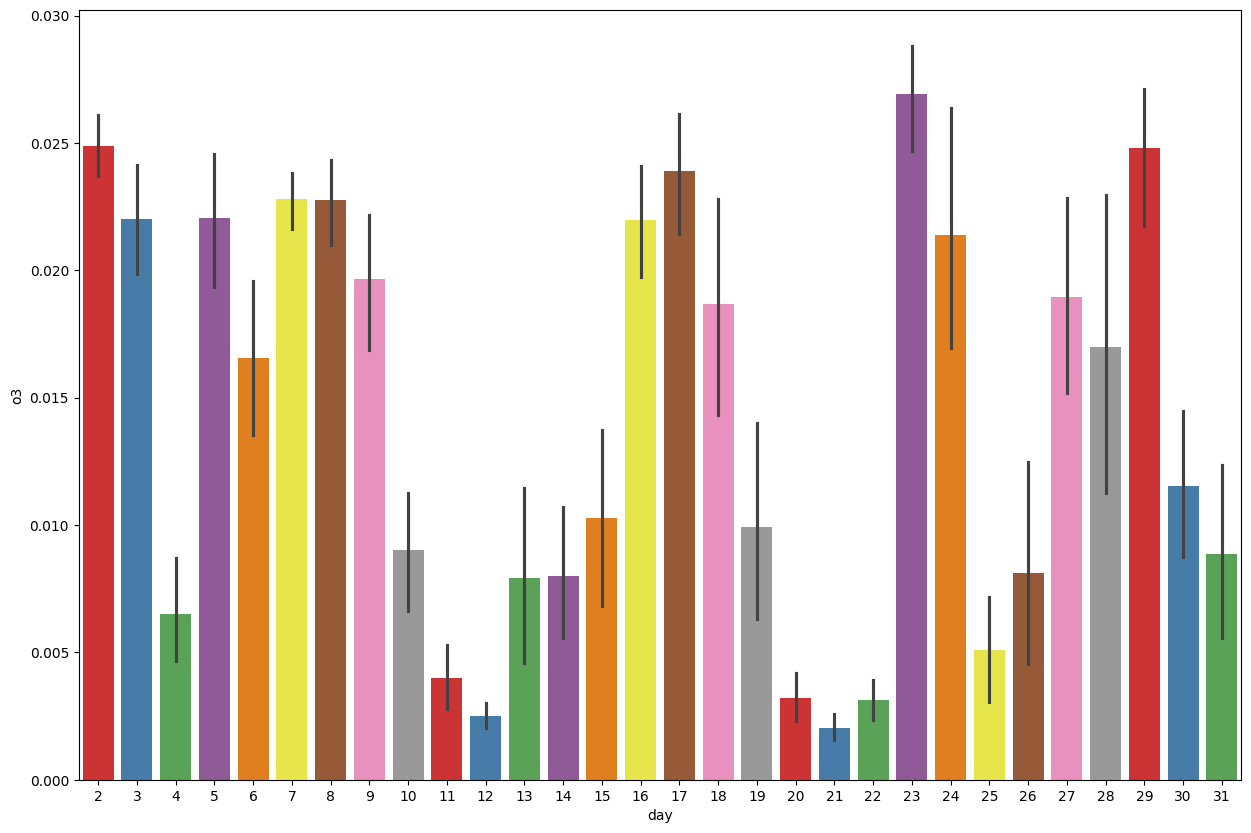

In [28]:
# 답
plt.figure(figsize=(15, 10))

sns.barplot(x='day', y='o3', data=df, palette='Set1')
plt.show()